# Hyperparameters Tuning

__The dataset__

The dataset relate to credit card defaults.
It contains variables related to the financial history of some consumers in Taiwan. It was 30,000 users and 24 attributes.

Our modeling target is wheter they defaulted on their loan.

is has already been preprocessed and ot times we will take smaller samples to demonstrate a concept.

`https://archive.ics.uci.edu/ml/datasets/default-of-credit-card-clients`


In [14]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_excel('../TreeBasedModels/data/default of credit card clients.xls',
                     header=1,
                     index_col=0)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
# length of rows and columns
print(data.shape)

(30000, 24)


In [17]:
# data types
print(data.dtypes)

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [18]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [19]:
# check for missing values
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [20]:
# Attributes are from column 1 to 24
X = data.iloc[:, 1:24]
y = data['default payment next month']

In [21]:
# Targets are the last column
y.value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [22]:
# Split data in Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## __What is a parameter?__

- Component of the model learned during the modeling process.
- You don't set three manually (you can't in fact), The algotihm will discover these for you.


### Parameters in Logistic Regression

In [23]:
# A simple logistic regression model:
log_reg_clf = LogisticRegression()

# Train the model
log_reg_clf.fit(X_train, y_train)

# Extract the coefficients of the Logistic Regression estimator
print(log_reg_clf.coef_)

[[-1.25860093e-03 -1.35582542e-03 -1.19855622e-03 -2.52911659e-02
   1.00161246e-03  1.00038801e-03  9.48050547e-04  9.56233272e-04
   9.22481616e-04  9.04857217e-04 -1.05068126e-05  6.64965682e-06
   2.72915792e-06  1.52427946e-08  2.14691086e-06  2.20426736e-06
  -3.11141078e-05 -2.64964386e-05 -1.05770634e-05 -1.10444872e-05
  -7.47416287e-06 -6.63982910e-06  1.09465757e-03]]


/Users/gblasd/Documents/Code/EsembleML/ensembleml/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tidy up the coefficients

In [24]:
# Get the original variable names
original_variables = list(X_train.columns)

# Zip together the names and coefficients
zipped_together = zip(original_variables, log_reg_clf.coef_[0])
coefs = [list(x) for x in zipped_together]

# Put into a DataFrame with column labels
coefs = pd.DataFrame(coefs, columns=["Variable", "Coefficient"])
print(coefs)

                      Variable   Coefficient
0                          SEX -1.258601e-03
1                    EDUCATION -1.355825e-03
2                     MARRIAGE -1.198556e-03
3                          AGE -2.529117e-02
4                        PAY_0  1.001612e-03
5                        PAY_2  1.000388e-03
6                        PAY_3  9.480505e-04
7                        PAY_4  9.562333e-04
8                        PAY_5  9.224816e-04
9                        PAY_6  9.048572e-04
10                   BILL_AMT1 -1.050681e-05
11                   BILL_AMT2  6.649657e-06
12                   BILL_AMT3  2.729158e-06
13                   BILL_AMT4  1.524279e-08
14                   BILL_AMT5  2.146911e-06
15                   BILL_AMT6  2.204267e-06
16                    PAY_AMT1 -3.111411e-05
17                    PAY_AMT2 -2.649644e-05
18                    PAY_AMT3 -1.057706e-05
19                    PAY_AMT4 -1.104449e-05
20                    PAY_AMT5 -7.474163e-06
21        

Now sort and print the top of top three coefficients

In [25]:
coefs.sort_values(by="Coefficient", inplace=True, ascending=False)
print(coefs.head(3))

                      Variable  Coefficient
22  default payment next month     0.001095
4                        PAY_0     0.001002
5                        PAY_2     0.001000


### Parameters in Random Forest

What about tree based algorithms? 

Random Forest has no coefficients, but node decisions (what feature and what values to split on).

In [26]:
from sklearn.ensemble import RandomForestClassifier

# A simple random forest estimator
rf_clf = RandomForestClassifier(max_depth=3)
rf_clf.fit(X_train, y_train)

# Pull out one tree from the forest
chosen_tree = rf_clf.estimators_[7]

In [27]:
rf_clf

RandomForestClassifier(max_depth=3)

In [28]:
rf_clf.feature_importances_

array([2.73398427e-05, 6.13575509e-05, 5.73757502e-05, 4.26449497e-04,
       1.48016960e-01, 8.47527847e-02, 6.90701761e-02, 3.38821505e-02,
       2.77724071e-02, 2.21617117e-02, 1.29337349e-03, 3.08893788e-03,
       1.75181452e-03, 1.40084609e-03, 1.08508801e-03, 6.86172358e-04,
       9.05893623e-03, 1.01807126e-02, 5.18178117e-03, 4.17977377e-03,
       3.88699268e-03, 4.52644408e-03, 5.67450414e-01])

In [29]:
rf_clf.feature_names_in_

array(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'], dtype=object)

In [30]:
rf_clf.estimator_

DecisionTreeClassifier()

In [31]:
rf_clf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1075897659),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=920556058),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1514939267),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1842133963),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1742719689),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1493192249),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1536691689),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=712772154),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1771300521),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                    

In [32]:
rf_clf.estimators_[7]

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=712772154)

In [33]:
chosen_tree

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=712772154)

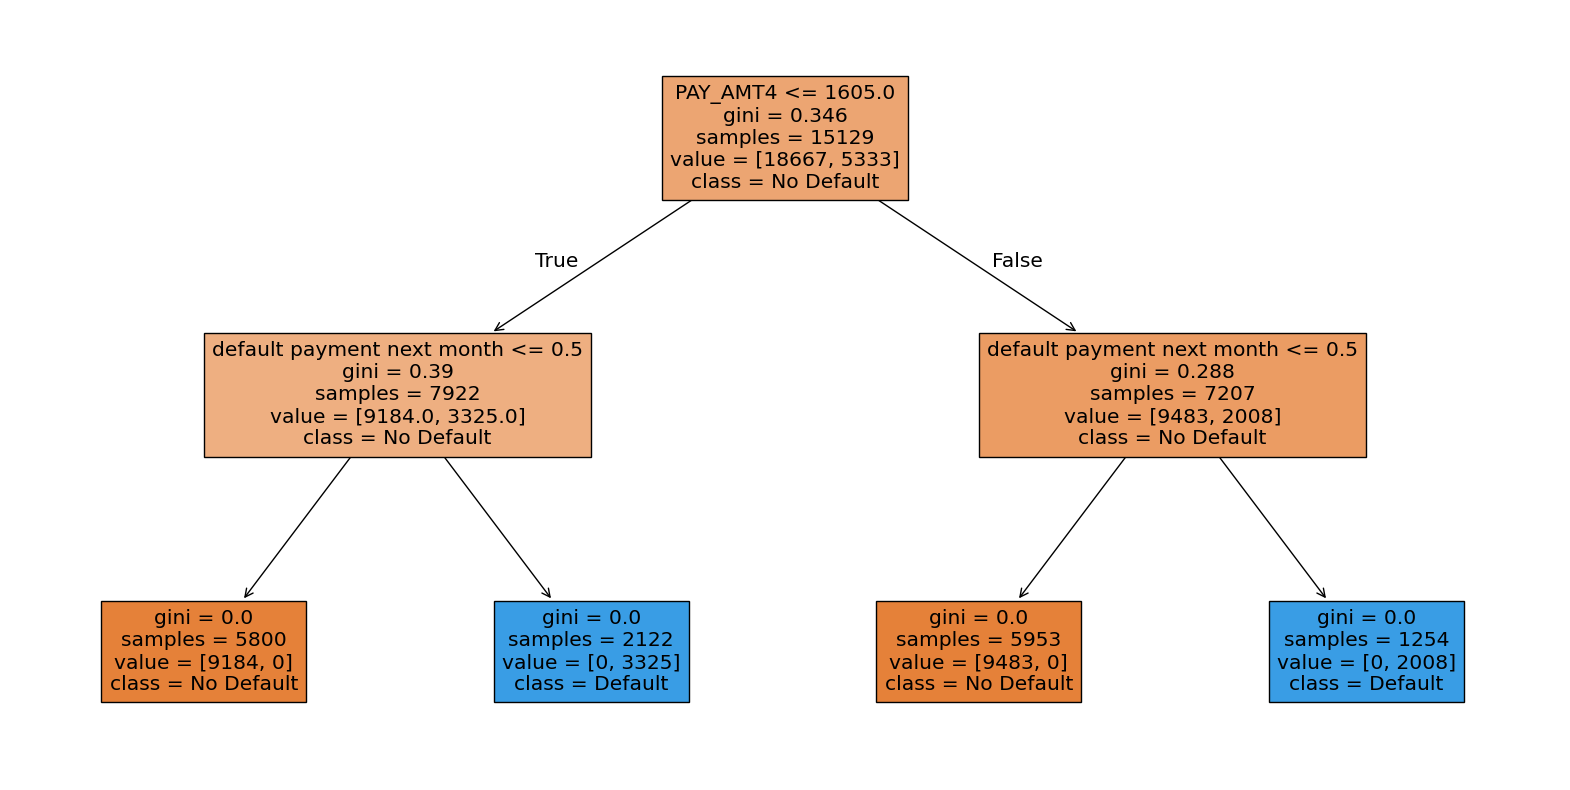

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(chosen_tree, 
          feature_names=X.columns, 
          class_names=['No Default', 'Default'], 
          filled=True)
plt.show()

__Extracting Node Decisions__

We can pull out details of the left, second-from-to node:

In [35]:
# Get the column it split on
split_column = chosen_tree.tree_.feature[1]
split_column_name = X.columns[split_column]

# Get the value ot split it
split_value = chosen_tree.tree_.threshold[1]

print("This node split on feature {} at value {}"
      .format(split_column_name, split_value))

This node split on feature default payment next month at value 0.5


## __What is a Hyperparameters__

Hyperparameters:

* Something you set before the modeling process (like knobs on an old radio)
    * Ypu also 'tune' your model hyperparameters!
* The algorithm does not lear these.

### Hyperparameters in Random Forest

In [40]:
# Create a simple random forest estimator and print it out
rf_clf = RandomForestClassifier()
rf_clf

RandomForestClassifier()

In [44]:
RandomForestClassifier(n_estimators='warn',
                       criterion='gini',
                       max_depth=None,
                       max_features='auto',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_split=None,
                       min_samples_leaf=1,
#                       min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       n_jobs=None,
                       oob_score=False,
                       random_state=None,
                       verbose=0,
                       bootstrap=True,
                       class_weight=None,
                       warm_start=False)

RandomForestClassifier(max_features='auto', min_samples_split=None,
                       n_estimators='warn')

__A single hyperparameter__

Take the `n_estimators` parameters.

Data Type & Default Value:

> n_estimators: integer, optional (default=0)

Definition:

> The number of threes in the forest

In [45]:
# Set some hyperparameters at estimator creation
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_clf

RandomForestClassifier(criterion='entropy')

__Random Forest: Important Hyperparameters__

Some important hyperparameters:

* `n_estomators` (high value)
* `max_features` (try different values)
* `max_depth` & `min_sample_leaf` (important for overfitting)
* (maybbe) `criterion`

_This is only a guide_

### Hyperparameters in Logistic Regression

In [46]:
# Find the hyperparameters of a Logistic Regression

log_reg_clf = LogisticRegression()
log_reg_clf

LogisticRegression()

In [47]:
# There are less hyperparameters to tune with this algorithm!
LogisticRegression(C=1.0,
                   class_weight=None,
                   dual=None,
                   fit_intercept=True,
                   intercept_scaling=1,
                   max_iter=100,
                   multi_class='warn',
                   n_jobs=None,
                   penalty='l2',
                   random_state=None,
                   solver='warn',
                   tol=0.0001,
                   verbose=0,
                   warm_start=False)

LogisticRegression(dual=None, multi_class='warn', solver='warn')

__Hyperparameters Importance__

Some hyperparameters are more important then others.

Some will __not__ help model performance:

For the ranfom forest classifier:

* `njobs`
* `random_state`
* `verbose`

Not all hyperparameters make sense to 'train'

### __How to finf hyperparameters the matter?__

Some resources for learning this:

* Academic papers
* Scikit-Learn module documentation
* __Experience__

## Hyperparameters Values

Some hyperparameters are more important than others to being tuning.

But which _values_ to try for hyperparameters?

* Specific to each algorithm & hyperparameter
* Some best practice guidelines & tips do exist


__Conflicting Hyperparameters Choices__

Be aware of conflicting hyperparameters choices.

* `LogisticRegression()` conflicting parameter options of `solver` & `penalty` that clonflict.

```
The 'newton-cg', 'sag' and 'lbfgs' solvers support only l2 penalties.
```

Some aren't explicit but will just 'ignore' (from `ElasticNet` with the `normalize` hyperparameter):

```
This paramater is ignored when fit_intercept is set to False
```

Make sure to consult the Scikit Learn Doc's.

__Silly Hyperparameter Values__

Be aware of setting 'silly' values for differents algorithms:

* Random forest with low numbers of trees?
    * Woul you consider it a 'forest' with only 2 trees.

* 1 Neighbor in KNN algoritm
    * Averaging the 'votes' of one person doesn't sound very robust!

* Increasing a hyperparameter by a very small amount.

Spending time documenting sensible values for hyperparameters is a valuable activity.

### __Automating Hyperparameter Tuning__

Try for a loop to iterate through options:

In [51]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

neighbors_list = [3, 5, 10, 20, 50, 75]
accuracy_list = []

for test_number in neighbors_list:
    model = KNeighborsClassifier(n_neighbors=test_number)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)

In [60]:
results_df = pd.DataFrame({'neighbors': neighbors_list,
                           'accuracy': accuracy_list})
results_df

,neighbors,accuracy
0,3,0.752000
1,5,0.773000
2,10,0.785833
3,20,0.786333
4,50,0.784500
5,75,0.783667


### __Learning Curves__

Let's create a learning curve graph.
We'll many more values this time.

In [61]:
neighbors_list = list(range(5, 500, 5))
accuracy_list = []

for test_number in neighbors_list:
    model = KNeighborsClassifier(n_neighbors=test_number)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)

results_df = pd.DataFrame({'neighbors': neighbors_list,
                           'accuracy': accuracy_list})

results_df

,neighbors,accuracy
0,5,0.773000
1,10,0.785833
2,15,0.783833
3,20,0.786333
4,25,0.784833
...,...,...
94,475,0.781167
95,480,0.781167
96,485,0.781167
97,490,0.781167


We can plot the larger DataFrame

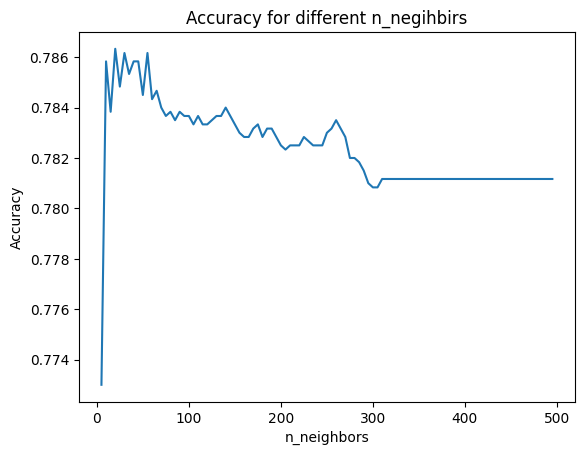

In [68]:
from matplotlib import pyplot as plt

plt.plot(results_df['neighbors'],
         results_df['accuracy'])

# Add the labels and title
plt.gca().set(xlabel='n_neighbors', 
              ylabel='Accuracy', 
              title='Accuracy for different n_negihbirs')

plt.show()

### __Hyperparameter for the GBM algorithm__

An important hyperparameter for the GBM algoritm is the learning rate. But which rate is best for this problem? By writting a loop to search through number of possibilities, collating these and viewing then ypu can find the best one.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
results_df

,learning_rate,accuracy
0,0.001,0.781167
1,0.010,1.000000
2,0.050,1.000000
3,0.100,1.000000
4,0.200,1.000000
5,0.500,1.000000


__Building Learning Curves__

If we want to test many different values for a single hyperparameter it can be difficult to easily view thet in the form of a DataFrame. 

In [72]:
import numpy as np

#  A useful function from NumPy is np.linspace(start, end, num) 
#  which allows you to create a number of values (num) evenly spread within an 
#  interval (start, end) that you specify.

# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))


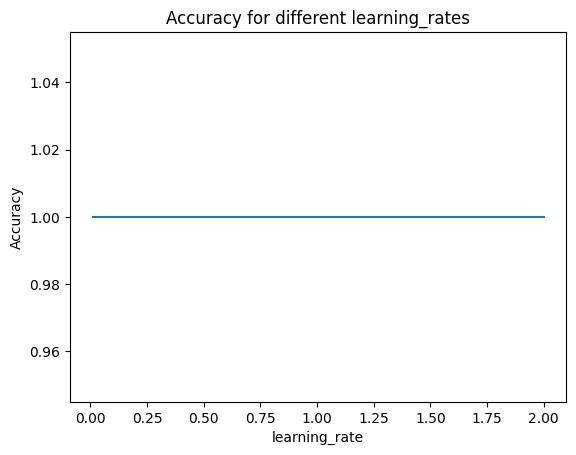

In [77]:
# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()